In [1]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline   # To see the visualization within the notebook 

In [3]:
data = pd.read_csv("C:/JS/Clustering_Python/Song_Football1.csv", encoding='latin-1')

In [4]:
data.head()

,Player Id,Tackles,wontackles,duels,wonduels,passes,wonpasses,interception,First_Name,Last_Name
0,3,28,0.642857,170,0.394118,1108,0.753610,30,Giggs,Ryan
1,363,39,0.641026,107,0.532710,1137,0.930519,24,Scholes,Paul
2,973,32,0.656250,104,0.625000,297,0.713805,23,Woodgate,Jonathan
3,1059,28,0.785714,135,0.577778,424,0.738208,32,Gabbidon,Daniel
4,1131,12,0.916667,58,0.620690,232,0.780172,14,Bramble,Titus


In [ ]:
# Player name - "Song" he is not fit 
# Similarity criteria for football players 
# Depending on role
# Successful Defends 
# shots
# passes
# Height
# Weight 
# Age
# .....

In [5]:
data.shape  # 480 rows and 10 column 

# Should I create less cluster, let's say 5  => On an average 100 players in each cluster 
# Should I create more cluster, let's say 20 => On an average 25 players in each cluster 

(480, 10)

In [6]:
# Let's take a look at the data for player song 
data.loc[data['First_Name'] == "Song"]

,Player Id,Tackles,wontackles,duels,wonduels,passes,wonpasses,interception,First_Name,Last_Name
263,21091,100,0.73,396,0.474747,2261,0.839894,66,Song,Alexandre


In [7]:
# Let's find out the subsitute player manually 
# let's pick the record number 260 to 270 
data.iloc[260:270,]

,Player Id,Tackles,wontackles,duels,wonduels,passes,wonpasses,interception,First_Name,Last_Name
260,20695,66,0.787879,294,0.435374,1384,0.778179,29,Antonio Valencia,0
261,21060,85,0.811765,465,0.475269,1318,0.751138,74,Gutiérrez,Jonás
262,21083,62,0.725806,426,0.462441,1112,0.791367,42,Dyer,Nathan
263,21091,100,0.730000,396,0.474747,2261,0.839894,66,Song,Alexandre
264,21094,32,0.656250,164,0.670732,1055,0.841706,59,Agger,Daniel
265,26725,69,0.811594,278,0.561151,1963,0.764646,31,José Enrique,0
266,26793,57,0.754386,228,0.684211,1508,0.831565,49,Skrtel,Martin
267,26900,25,0.800000,260,0.330769,851,0.736780,24,Odemwingie,Peter
268,27258,23,0.695652,73,0.465753,530,0.841509,15,Anderson,0
269,27341,117,0.709402,272,0.555147,1584,0.760732,89,Cabaye,Yohan


In [8]:
# Create a dataframe with only similarity parameters 
data.columns

Index(['Player Id', 'Tackles', 'wontackles', 'duels', 'wonduels', 'passes',
       'wonpasses', 'interception', 'First_Name', 'Last_Name'],
      dtype='object')

In [9]:
data_num = data[[ 'Tackles', 'wontackles', 'duels', 'wonduels', 'passes','wonpasses', 'interception']]

In [10]:
data_num.head()

,Tackles,wontackles,duels,wonduels,passes,wonpasses,interception
0,28,0.642857,170,0.394118,1108,0.753610,30
1,39,0.641026,107,0.532710,1137,0.930519,24
2,32,0.656250,104,0.625000,297,0.713805,23
3,28,0.785714,135,0.577778,424,0.738208,32
4,12,0.916667,58,0.620690,232,0.780172,14


In [ ]:
# Two special data processing steps:

# 1 - Scaling  => To bring all features in the same scale 
# Person   #Salary      #Kids 
# 1         50001        1 
# 2         50005        5 
           # ( ~4)      # (~4)

# 2 - Weighing 

In [12]:
import sklearn.preprocessing as preprocessing
data_scaled = preprocessing.scale(data_num, axis = 0)

In [13]:
data_scaled

array([[-0.07161472, -0.55356335,  0.19231802, ...,  0.72211922,
        -0.0331406 ,  0.20763391],
       [ 0.36102342, -0.56411628, -0.36985665, ...,  0.7741784 ,
         1.87028208, -0.05452552],
       [ 0.08570824, -0.47639505, -0.39662688, ..., -0.73374278,
        -0.46142054, -0.09821876],
       ...,
       [-0.81889878,  0.22383583, -1.07480585, ..., -1.09815706,
        -3.10520237, -0.88469705],
       [-1.01555248, -1.37669189, -1.253274  , ..., -1.21663658,
         0.69654158, -1.10316324],
       [-1.05488322, -0.41637526, -1.23542719, ..., -1.2417686 ,
         1.08080388, -1.05947   ]])

In [15]:
data_num.head(2)

,Tackles,wontackles,duels,wonduels,passes,wonpasses,interception
0,28,0.642857,170,0.394118,1108,0.753610,30
1,39,0.641026,107,0.532710,1137,0.930519,24


In [14]:
# Scaling is also known as normalization/ standardization of data or Z-scoring of data 
# ( value - mean of the col)/ stddev of column 
( 28 - np.mean(data_num['Tackles']))/np.std(data_num['Tackles'])

-0.07161472215323064

In [16]:
( 39 - np.mean(data_num['Tackles']))/np.std(data_num['Tackles'])

0.3610234162553024

In [ ]:
# DP1 = ( 10000, 5, 0.5, 20)
# DP2 = ( 15000, 7, 0.7, 25)

In [ ]:
# Weighing of data => To give importance to one of the feature 
# Number of credit cards          # Number of marriages 
#    1*5  =  5                                1
#    2*5  = 10                                2 
#    5*5  = 25                                3 

# In order to apply weight, we will multiply that column with a constant value 

# Approach 
# Start with a weight of 3 
# Build clusters 
# Do profiling and check the homogeneous nature of the weighted column, if acceptable okay 
# else
# Increase weight to 5 
# .... 
#.... 


In [ ]:
# Does order makes a difference 
# Can I do scaling first and then weighing ? 
# or its okay to weight first and than scale ?

# Always scaling first and than weighing 

In [17]:
# To apply weight 
data_num.head()

,Tackles,wontackles,duels,wonduels,passes,wonpasses,interception
0,28,0.642857,170,0.394118,1108,0.753610,30
1,39,0.641026,107,0.532710,1137,0.930519,24
2,32,0.656250,104,0.625000,297,0.713805,23
3,28,0.785714,135,0.577778,424,0.738208,32
4,12,0.916667,58,0.620690,232,0.780172,14


In [18]:
data_num['Tackles3'] = data_num['Tackles']*3

<ipython-input-18-a00ba4d80c65>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_num['Tackles3'] = data_num['Tackles']*3


In [19]:
data_num.head()

,Tackles,wontackles,duels,wonduels,passes,wonpasses,interception,Tackles3
0,28,0.642857,170,0.394118,1108,0.753610,30,84
1,39,0.641026,107,0.532710,1137,0.930519,24,117
2,32,0.656250,104,0.625000,297,0.713805,23,96
3,28,0.785714,135,0.577778,424,0.738208,32,84
4,12,0.916667,58,0.620690,232,0.780172,14,36


In [20]:
# Normalized value of first record of Tackels column 
( 28 - np.mean(data_num['Tackles']))/np.std(data_num['Tackles'])

-0.07161472215323064

In [22]:
# Normalized value of first record of Tackels ( weighted) column 
( 84 - np.mean(data_num['Tackles3']))/np.std(data_num['Tackles3'])

-0.0716147221532307

In [23]:
# Note:- Weighing before scaling should not be done. It makes no sense
# Weights should be applied on the scaled dataframe only 
data_scaled

array([[-0.07161472, -0.55356335,  0.19231802, ...,  0.72211922,
        -0.0331406 ,  0.20763391],
       [ 0.36102342, -0.56411628, -0.36985665, ...,  0.7741784 ,
         1.87028208, -0.05452552],
       [ 0.08570824, -0.47639505, -0.39662688, ..., -0.73374278,
        -0.46142054, -0.09821876],
       ...,
       [-0.81889878,  0.22383583, -1.07480585, ..., -1.09815706,
        -3.10520237, -0.88469705],
       [-1.01555248, -1.37669189, -1.253274  , ..., -1.21663658,
         0.69654158, -1.10316324],
       [-1.05488322, -0.41637526, -1.23542719, ..., -1.2417686 ,
         1.08080388, -1.05947   ]])

In [24]:
type(data_scaled)

numpy.ndarray

In [25]:
dataset = pd.DataFrame(data_scaled)
dataset.head()

,0,1,2,3,4,5,6
0,-0.071615,-0.553563,0.192318,-0.872459,0.722119,-0.033141,0.207634
1,0.361023,-0.564116,-0.369857,0.195498,0.774178,1.870282,-0.054526
2,0.085708,-0.476395,-0.396627,0.906657,-0.733743,-0.461421,-0.098219
3,-0.071615,0.269565,-0.120001,0.542776,-0.505759,-0.198862,0.295020
4,-0.700907,1.024100,-0.807104,0.873443,-0.850427,0.252652,-0.491458


In [28]:
data_scaled_bkp = data_scaled

In [29]:
data_scaled_bkp[:,0]  # First column of nparray 
data_scaled_bkp[:,0]*3

data_scaled_bkp[:,0] = data_scaled_bkp[:,0]*3

In [30]:
data_scaled_bkp

array([[-0.21484417, -0.55356335,  0.19231802, ...,  0.72211922,
        -0.0331406 ,  0.20763391],
       [ 1.08307025, -0.56411628, -0.36985665, ...,  0.7741784 ,
         1.87028208, -0.05452552],
       [ 0.25712471, -0.47639505, -0.39662688, ..., -0.73374278,
        -0.46142054, -0.09821876],
       ...,
       [-2.45669634,  0.22383583, -1.07480585, ..., -1.09815706,
        -3.10520237, -0.88469705],
       [-3.04665744, -1.37669189, -1.253274  , ..., -1.21663658,
         0.69654158, -1.10316324],
       [-3.16464966, -0.41637526, -1.23542719, ..., -1.2417686 ,
         1.08080388, -1.05947   ]])

In [48]:
data_scaled[:,0] = data_scaled[:,0]/3

In [49]:
data_scaled

array([[-0.07161472, -0.55356335,  0.19231802, ...,  0.72211922,
        -0.0331406 ,  0.20763391],
       [ 0.36102342, -0.56411628, -0.36985665, ...,  0.7741784 ,
         1.87028208, -0.05452552],
       [ 0.08570824, -0.47639505, -0.39662688, ..., -0.73374278,
        -0.46142054, -0.09821876],
       ...,
       [-0.81889878,  0.22383583, -1.07480585, ..., -1.09815706,
        -3.10520237, -0.88469705],
       [-1.01555248, -1.37669189, -1.253274  , ..., -1.21663658,
         0.69654158, -1.10316324],
       [-1.05488322, -0.41637526, -1.23542719, ..., -1.2417686 ,
         1.08080388, -1.05947   ]])

In [50]:
import sklearn.cluster as cluster

In [51]:
kmeans = cluster.KMeans(n_clusters=20, init="k-means++", random_state=20)

In [52]:
kmeans = kmeans.fit(data_scaled)  # fitting data to the K-means algo

In [53]:
kmeans.n_clusters  # It has created 20 clusters 

20

In [54]:
kmeans.labels_  # Cluster number assigned to each record 

array([15,  5, 19, 19, 10,  3, 17, 19,  3, 19, 15, 10, 16,  4,  0, 19, 11,
        2,  4, 10, 13,  6, 12,  0, 13, 10, 12,  3, 15, 19,  5,  0,  5,  3,
       10,  5, 10, 19,  2,  5, 15, 12, 16, 12,  9, 10, 13, 11, 14,  7, 19,
       19, 17, 13, 13,  0,  7, 12,  1, 12,  3, 13,  9,  3,  6, 11, 17, 15,
       15,  5, 10,  0, 16, 16, 17, 19,  0, 13,  5, 16,  9, 10,  9,  3, 12,
        5, 13,  0,  1, 19, 12,  3,  0, 19, 15,  0, 14,  9,  1, 15, 12,  0,
       15, 14,  9,  5, 13, 13,  3,  5,  5, 12, 13,  9,  6,  0, 19, 19,  6,
        5, 17,  9, 15, 15, 15, 17, 13,  0, 10,  9, 10, 10,  0,  0,  8,  7,
        5, 15, 11, 13,  9,  4, 18,  3,  0,  4,  6, 19, 13,  9, 17,  6, 11,
       12,  4, 15,  3, 10,  1, 10,  0,  5,  1, 12, 15,  3, 10,  3,  4, 12,
        6,  3,  0,  9, 10, 10, 19, 12, 13,  5, 13, 15,  4,  5,  3, 15,  1,
        5,  5, 12,  3,  0, 12,  7, 15, 11,  6, 10,  0,  0, 19, 13, 17,  1,
        3,  9, 17, 17, 11, 17,  0,  5, 19, 17,  0, 19,  0,  9, 19, 15, 12,
        5, 19, 17, 11,  2

In [55]:
len(kmeans.labels_ ) # same as number of records provided to 

480

In [56]:
data.head() # In this data set append a column of cluster number 
data['cluster_number'] = kmeans.labels_ 

In [57]:
data.head()

,Player Id,Tackles,wontackles,duels,wonduels,passes,wonpasses,interception,First_Name,Last_Name,cluster_number
0,3,28,0.642857,170,0.394118,1108,0.753610,30,Giggs,Ryan,15
1,363,39,0.641026,107,0.532710,1137,0.930519,24,Scholes,Paul,5
2,973,32,0.656250,104,0.625000,297,0.713805,23,Woodgate,Jonathan,19
3,1059,28,0.785714,135,0.577778,424,0.738208,32,Gabbidon,Daniel,19
4,1131,12,0.916667,58,0.620690,232,0.780172,14,Bramble,Titus,10


In [58]:
# Find out in which cluster player song is present ?
data.loc[data['First_Name'] == "Song"]

,Player Id,Tackles,wontackles,duels,wonduels,passes,wonpasses,interception,First_Name,Last_Name,cluster_number
263,21091,100,0.73,396,0.474747,2261,0.839894,66,Song,Alexandre,4


In [60]:
# Pull all the records of cluster_number 6 
data.loc[data['cluster_number'] == 4]

,Player Id,Tackles,wontackles,duels,wonduels,passes,wonpasses,interception,First_Name,Last_Name,cluster_number
13,1411,107,0.710280,319,0.529781,1736,0.891129,89,Parker,Scott,4
18,1632,85,0.705882,301,0.561462,2211,0.858435,72,Barry,Gareth,4
141,13310,81,0.679012,287,0.592334,1321,0.706283,103,Warnock,Stephen,4
145,14075,104,0.769231,411,0.591241,1696,0.829009,51,Evra,Patrice,4
154,14668,86,0.732558,324,0.490741,1684,0.833729,81,Reo-Coker,Nigel,4
168,15276,94,0.702128,370,0.510811,1838,0.695321,59,Barton,Joey,4
182,16058,66,0.772727,327,0.446483,1521,0.650888,94,Pedersen,Morten Gamst,4
261,21060,85,0.811765,465,0.475269,1318,0.751138,74,Gutiérrez,Jonás,4
263,21091,100,0.730000,396,0.474747,2261,0.839894,66,Song,Alexandre,4
269,27341,117,0.709402,272,0.555147,1584,0.760732,89,Cabaye,Yohan,4


## Profiling of clusters

In [61]:
# Gloabl mean of Tackels column 
data.Tackles.mean()

# On an avg a player is doing 30 tackels in his life time

29.820833333333333

In [62]:
# Average tackle value for each cluster 
data.groupby('cluster_number').aggregate('mean')['Tackles']

cluster_number
0     64.717391
1      9.095238
2      2.363636
3     22.585366
4     92.200000
5     34.416667
6      6.533333
7     39.538462
8      1.400000
9     11.000000
10    10.743590
11     4.933333
12    62.615385
13    17.840000
14     1.166667
15    39.000000
16     4.111111
17    27.392857
18     2.000000
19    38.485714
Name: Tackles, dtype: float64

In [63]:
# Gloabl mean of Tackels column 
data.passes.mean()

# On an avg a player is doing 30 tackels in his life time

705.7375

In [64]:
data_scaled

array([[-0.07161472, -0.55356335,  0.19231802, ...,  0.72211922,
        -0.0331406 ,  0.20763391],
       [ 0.36102342, -0.56411628, -0.36985665, ...,  0.7741784 ,
         1.87028208, -0.05452552],
       [ 0.08570824, -0.47639505, -0.39662688, ..., -0.73374278,
        -0.46142054, -0.09821876],
       ...,
       [-0.81889878,  0.22383583, -1.07480585, ..., -1.09815706,
        -3.10520237, -0.88469705],
       [-1.01555248, -1.37669189, -1.253274  , ..., -1.21663658,
         0.69654158, -1.10316324],
       [-1.05488322, -0.41637526, -1.23542719, ..., -1.2417686 ,
         1.08080388, -1.05947   ]])

In [65]:
data.groupby('cluster_number').aggregate('mean')['passes']

cluster_number
0     1005.934783
1      241.904762
2      396.272727
3      560.634146
4     1823.900000
5      819.416667
6      120.600000
7     1093.230769
8      549.600000
9      248.805556
10     180.589744
11     157.433333
12    1776.000000
13     501.720000
14    1160.500000
15    1316.393939
16      82.555556
17     830.821429
18      34.200000
19     608.200000
Name: passes, dtype: float64

In [70]:
data.groupby('cluster_number', as_index=False).aggregate(
    {'Player Id': 'count',
     'Tackles': 'mean', 
     'wontackles': 'mean',
     'duels': 'mean',
     'wonduels': 'mean',
     'passes': 'mean',
     'wonpasses': 'mean',
     'interception': 'mean'
     }).rename(columns={'Player Id': '# of Players'})

,cluster_number,# of Players,Tackles,wontackles,duels,wonduels,passes,wonpasses,interception
0,0,46,64.717391,0.755743,226.304348,0.568114,1005.934783,0.754034,52.652174
1,1,21,9.095238,0.881544,44.190476,0.448685,241.904762,0.819610,5.809524
2,2,11,2.363636,0.068182,22.000000,0.474016,396.272727,0.638921,2.818182
3,3,41,22.585366,0.737429,122.756098,0.443611,560.634146,0.778457,17.853659
4,4,20,92.200000,0.739827,352.400000,0.532199,1823.900000,0.805072,76.400000
5,5,36,34.416667,0.769723,125.500000,0.589211,819.416667,0.851605,33.805556
6,6,15,6.533333,0.629091,52.933333,0.384111,120.600000,0.707216,4.133333
7,7,13,39.538462,0.739388,434.769231,0.424784,1093.230769,0.744307,28.692308
8,8,5,1.400000,0.066667,7.800000,0.936720,549.600000,0.649913,2.400000
9,9,36,11.000000,0.588705,46.833333,0.518667,248.805556,0.840198,8.694444


In [73]:
# Find out minimum and max value of tackels column for each cluster 
data.groupby('cluster_number').aggregate(['min', 'max'])['Tackles']

,min,max
cluster_number,,
0,41,95
1,1,19
2,1,8
3,8,44
4,56,117
5,13,68
6,2,12
7,17,62
8,1,3


In [79]:
# build clusters on weighted version 
data_scaled_bkp[:,0] = data_scaled_bkp[:,0]*7
kmeans1 = cluster.KMeans(n_clusters=20, init="k-means++", random_state=20)
kmeans1 = kmeans.fit(data_scaled_bkp) 

In [80]:
data['cluster_number_n'] = kmeans1.labels_ 
data.groupby('cluster_number_n').aggregate(['min', 'max'])['Tackles']

,min,max
cluster_number_n,,
0,41,46
1,1,4
2,94,101
3,12,16
4,33,37
5,65,73
6,22,27
7,2,7
8,53,58


In [76]:
data_scaled_bkp

array([[-0.21484417, -0.55356335,  0.19231802, ...,  0.72211922,
        -0.0331406 ,  0.20763391],
       [ 1.08307025, -0.56411628, -0.36985665, ...,  0.7741784 ,
         1.87028208, -0.05452552],
       [ 0.25712471, -0.47639505, -0.39662688, ..., -0.73374278,
        -0.46142054, -0.09821876],
       ...,
       [-2.45669634,  0.22383583, -1.07480585, ..., -1.09815706,
        -3.10520237, -0.88469705],
       [-3.04665744, -1.37669189, -1.253274  , ..., -1.21663658,
         0.69654158, -1.10316324],
       [-3.16464966, -0.41637526, -1.23542719, ..., -1.2417686 ,
         1.08080388, -1.05947   ]])

In [ ]:
# Weight on two columns 
data_scaled_bkp[:,0] = data_scaled_bkp[:,0]*5
data_scaled_bkp[:,1] = data_scaled_bkp[:,1]*3
kmeans1 = cluster.KMeans(n_clusters=20, init="k-means++", random_state=20)
kmeans1 = kmeans.fit(data_scaled_bkp) 

### Optimal Number of clusters

In [85]:
from scipy.spatial.distance import cdist

C:\Users\anparash\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


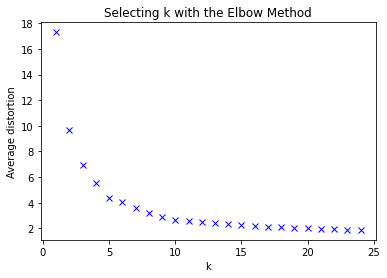

In [94]:
## Elbow method
from scipy.spatial.distance import cdist
K=range(1,25)  # 
wss = []
for k in K:
    kmeans = cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(data_scaled)   # Only thing to be changed in this code 
    wss.append(sum(np.min(cdist(data_scaled, kmeans.cluster_centers_, 'euclidean'), 
                                      axis=1)) / data_scaled.shape[0])

plt.plot(K, wss, 'bx')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

In [88]:
# With only one cluster 
kmeans1 = cluster.KMeans(n_clusters=1, init="k-means++", random_state=20)
kmeans1 = kmeans1.fit(data_scaled) 
(sum(np.min(cdist(data_scaled, kmeans1.cluster_centers_, 'euclidean'), axis=1)) / data_scaled.shape[0])

C:\Users\anparash\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


17.303839381589523

In [89]:
# With two cluster 
kmeans2 = cluster.KMeans(n_clusters=2, init="k-means++", random_state=20)
kmeans2 = kmeans2.fit(data_scaled) 
(sum(np.min(cdist(data_scaled, kmeans2.cluster_centers_, 'euclidean'), axis=1)) / data_scaled.shape[0])

9.678266610046396

In [91]:
# With three cluster 
kmeans3 = cluster.KMeans(n_clusters=3, init="k-means++", random_state=20)
kmeans3 = kmeans3.fit(data_scaled) 
(sum(np.min(cdist(data_scaled, kmeans3.cluster_centers_, 'euclidean'), axis=1)) / data_scaled.shape[0])

6.925735315724329

In [92]:
# With three cluster 
kmeans20 = cluster.KMeans(n_clusters=20, init="k-means++", random_state=20)
kmeans20 = kmeans20.fit(data_scaled) 
(sum(np.min(cdist(data_scaled, kmeans20.cluster_centers_, 'euclidean'), axis=1)) / data_scaled.shape[0])

1.9981079970609434

In [ ]:
# Silhouette Score 
# An indication of how well your clusters are 
# It is a number between +1 to -1 
# +1 :- Clusters are well apart from each other and clearly identifiable 
# 0 :- Clusters tends to come closer to each other 
# -1 :- Clusters are assigned in wrong away 

In [96]:
import sklearn.metrics as metrics

NameError: name 'labels' is not defined

In [104]:
labels = cluster.KMeans(n_clusters=4).fit(data_scaled).labels_
metrics.silhouette_score(data_scaled, labels, metric = "euclidean")

# Silhouette score when you are creating 4 clusters 

0.5612518525366821

In [102]:
labels = cluster.KMeans(n_clusters=6).fit(data_scaled).labels_
metrics.silhouette_score(data_scaled, labels, metric = "euclidean")

# Silhouette score when you are creating 6 clusters 

0.5191942356373112

In [100]:
labels = cluster.KMeans(n_clusters=7).fit(data_scaled).labels_
metrics.silhouette_score(data_scaled, labels, metric = "euclidean")

# Silhouette score when you are creating 7 clusters 

0.4592085199457241

In [101]:
labels = cluster.KMeans(n_clusters=8).fit(data_scaled).labels_
metrics.silhouette_score(data_scaled, labels, metric = "euclidean")

# Silhouette score when you are creating 8 clusters 

0.46517481412714784

In [103]:
labels = cluster.KMeans(n_clusters=20).fit(data_scaled).labels_
metrics.silhouette_score(data_scaled, labels, metric = "euclidean")

# Silhouette score when you are creating 20 clusters 

0.2996508439920718

## Hierachical Clustering

In [105]:
dataset = pd.read_csv("C:/JS/Clustering_Python/Customers.csv")

In [106]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Let's segment this data by using H-clust 
# Similarity features 
# Annual Income 
# Spending Score

In [107]:
# Create a dataframe that contains only similarity features 
X = dataset.iloc[ :, [3,4]].values

In [109]:
#X

In [110]:
# Create a dendrogram 
import scipy.cluster.hierarchy as sch

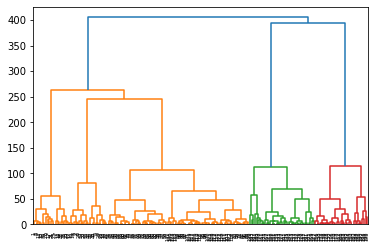

In [111]:
dendogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [112]:
from sklearn.cluster import AgglomerativeClustering

In [113]:
hc = AgglomerativeClustering(n_clusters=5, affinity = "euclidean", linkage = "ward")

In [114]:
y_hc = hc.fit_predict(X)

In [115]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [117]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [116]:
#Annual income of people in cluster 0 
X[y_hc==0,0]

array([ 71,  71,  73,  73,  74,  75,  77,  78,  78,  78,  78,  78,  78,
        81,  85,  86,  87,  87,  87,  88,  88,  93,  97,  98,  99, 101,
       103, 103, 113, 120, 126, 137], dtype=int64)

In [118]:
#spend of people in cluster 0 
X[y_hc==0,1]

array([11,  9,  5,  7, 10,  5, 12, 22, 17, 20, 16,  1,  1,  5, 26, 20, 27,
       13, 10, 13, 15, 14, 32, 15, 39, 24, 17, 23,  8, 16, 28, 18],
      dtype=int64)

In [119]:
#Annual income of people in cluster 4
X[y_hc==4,0]

array([15, 16, 17, 18, 19, 19, 20, 20, 21, 23, 24, 25, 28, 28, 29, 30, 33,
       33, 34, 37, 38, 39, 39], dtype=int64)

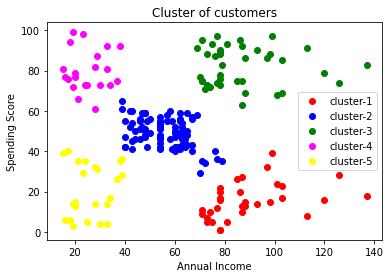

In [122]:
#lets visualize 
plt.scatter(X[y_hc==0,0], X[y_hc==0,1], c = "red", label = "cluster-1")
plt.scatter(X[y_hc==1,0], X[y_hc==1,1], c = "blue", label = "cluster-2")
plt.scatter(X[y_hc==2,0], X[y_hc==2,1], c = "green", label = "cluster-3")
plt.scatter(X[y_hc==3,0], X[y_hc==3,1], c = "magenta", label = "cluster-4")
plt.scatter(X[y_hc==4,0], X[y_hc==4,1], c = "yellow", label = "cluster-5")
plt.title("Cluster of customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()


In [ ]:
# Advantage of H-Clust 

# 1 - You need not to have prior information of number of clusters 
# 2 - This can be supportive approach to find out optimal number of clusters 

# Disadvantage 

# - Larage space and time complexity makes it non-useable when dataset is bigger